In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [208]:
data = pd.read_csv('./Data2/target_gwanak.csv')
data.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,점포수,총매출액,점포매출액
0,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,71,35082548052,4.941204e+08
1,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000811,봉천로13길,1,144068088,1.440681e+08
2,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000783,관악로30길,36,6441883635,1.789412e+08
3,2014,1,A,골목상권,11620,관악구,11620545,청림동,1000835,청림3길,20,2556825805,1.278413e+08
4,2014,1,A,골목상권,11620,관악구,11620565,성현동,1000786,구암길,15,486805533,3.245370e+07


### 점포수 관련 데이터 더 가져오기

In [209]:
shop = pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_2014년.csv',encoding='euc-kr')

In [210]:
shop.isnull().sum()

기준_년_코드        0
기준_분기_코드       0
상권_구분_코드       0
상권_구분_코드_명     0
상권_코드          0
상권_코드_명        0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

In [211]:
for i in range(2015,2022):
    shop_temp =  pd.read_csv(f'./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_{i}년.csv',encoding='euc-kr')
    shop=pd.concat([shop,shop_temp],axis=0)

shop.isnull().sum()

기준_년_코드           0
기준_분기_코드          0
상권_구분_코드          0
상권_구분_코드_명     3933
상권_코드             0
상권_코드_명           0
서비스_업종_코드         0
서비스_업종_코드_명       0
점포_수              0
유사_업종_점포_수        0
개업_율              0
개업_점포_수           0
폐업_률              0
폐업_점포_수           0
프랜차이즈_점포_수        0
dtype: int64

In [212]:
shop.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [213]:
data.shape

(1984, 13)

In [214]:
shop=shop[shop['서비스_업종_코드_명'].isin(
       ['한식음식점', '중식음식점', '일식음식점', '양식음식점',
          '패스트푸드점', '분식전문점',
          '치킨전문점','제과점','호프-간이주점','커피-음료'])]

In [215]:
# shop 상권별로 합치기
shop=shop.pivot_table(index=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'],
                 values=['점포_수', '유사_업종_점포_수','개업_점포_수','폐업_점포_수', '프랜차이즈_점포_수'],
                 aggfunc=np.sum
                 )
shop.reset_index(inplace=True)

In [216]:
data=pd.merge(data,shop,on=['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명'])

In [217]:
data.iloc[:,10:].corr()

,점포수,총매출액,점포매출액,개업_점포_수,유사_업종_점포_수,점포_수,폐업_점포_수,프랜차이즈_점포_수
점포수,1.000000,0.895559,0.772949,0.717909,0.979183,0.974042,0.727713,0.896736
총매출액,0.895559,1.000000,0.835705,0.652042,0.885501,0.878973,0.681702,0.819798
점포매출액,0.772949,0.835705,1.000000,0.505570,0.767843,0.770178,0.533696,0.673193
개업_점포_수,0.717909,0.652042,0.505570,1.000000,0.740524,0.739071,0.744035,0.666699
유사_업종_점포_수,0.979183,0.885501,0.767843,0.740524,1.000000,0.996099,0.735115,0.909446
점포_수,0.974042,0.878973,0.770178,0.739071,0.996099,1.000000,0.730291,0.869202
폐업_점포_수,0.727713,0.681702,0.533696,0.744035,0.735115,0.730291,1.000000,0.677761
프랜차이즈_점포_수,0.896736,0.819798,0.673193,0.666699,0.909446,0.869202,0.677761,1.000000


In [218]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '유사_업종_점포_수', '점포_수', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [219]:
# feature = data[['점포수', '개업_점포_수','프랜차이즈_점포_수','행정동_코드_명_낙성대동',
#        '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
#        '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
#        '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
#        '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
#        '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
# target = data['점포매출액']

In [220]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.model_selection import train_test_split

def model_err_measure(feature,target):
    lr = LinearRegression()
    rd = Ridge()
    ls = Lasso()
    
    train_input , test_input , train_target , test_target = \
        train_test_split(feature,target)
    lr.fit(train_input,train_target)
    rd.fit(train_input,train_target)
    ls.fit(train_input,train_target)
    predict_lr = lr.predict(test_input)
    predict_rd = rd.predict(test_input)
    predict_ls = ls.predict(test_input)
    from module.error import measure_error
    err_lr = measure_error('lr',predict_lr,test_target)
    err_rd = measure_error('rd',predict_rd,test_target)
    err_ls = measure_error('ls',predict_ls,test_target)
    a=pd.DataFrame([err_lr])
    b=pd.DataFrame([err_rd])
    c=pd.DataFrame([err_ls])

    error = pd.concat([a,b,c],axis=0)
    return error

### 점포수 디테일에 대해서 알아보자.

In [221]:
data.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액',
       '개업_점포_수', '유사_업종_점포_수', '점포_수', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

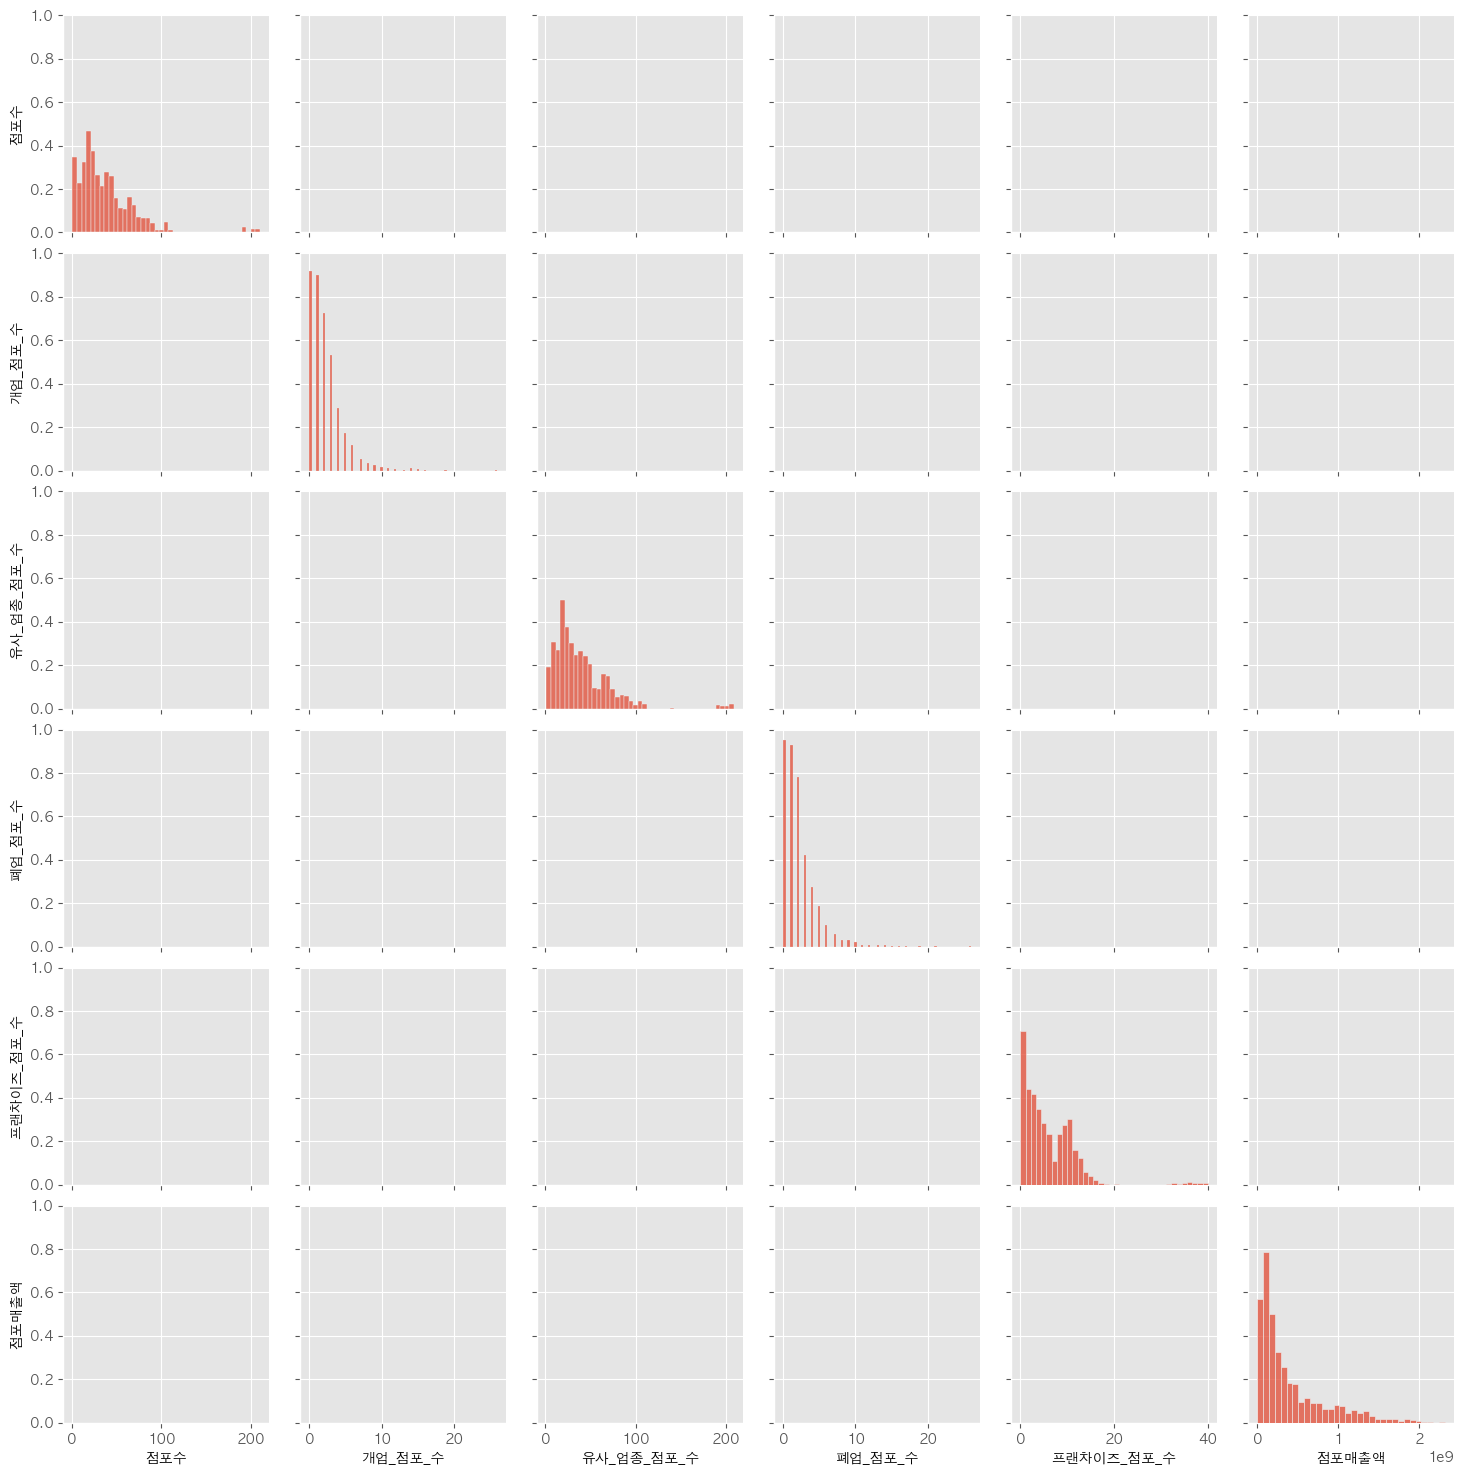

In [230]:
sns.pairplot(
    data,
    vars=[ '점포수', '개업_점포_수', '유사_업종_점포_수', '폐업_점포_수', '프랜차이즈_점포_수', '점포매출액']
)

In [ ]:
sns.lmplot(
    x='점포수',
    y='점포매출액',
    data=data
)

plt.show()

In [ ]:
sns.lmplot(
    x='프랜차이즈_점포_수',
    y='점포매출액',
    data=data
)

In [ ]:
sns.lmplot(
    x='폐업_점포_수',
    y='점포매출액',
    data=data
)

In [ ]:
sns.lmplot(
    x='개업_점포_수',
    y='점포매출액',
    data=data
)

In [ ]:
sns.lmplot(
    x='유사_업종_점포_수',
    y='점포매출액',
    data=data
)

In [ ]:
table=data.iloc[:,13:].corr()
sns.heatmap(
	table,
	annot=True,
	fmt='f',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

### 유사업종점포수와 프랜차이즈 점포수는 다중공선성을 보이고
### 폐업점포수와 개업점포수도 다중공선성을 보여서 둘 중하하나는 제거 해야 할 듯 보이고요
### 점포수도 비교해 봤을 때는 애매해서 이중 총 3가지를 쓸 생각이다.

### 3가지 - 점포수 , 프랜차이즈 점포수 , 개업점포수

### 이거 특성공학 해보기

In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '1'

train_poly =np.log1p(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

columns

In [ ]:
data=pd.concat([data,train_poly],axis=1)

In [ ]:
train_input = data[['점포수','개업_점포_수','프랜차이즈_점포_수']]
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)


columns=poly.get_feature_names_out() + '2'


train_poly =np.sqrt(train_poly) 

train_poly = pd.DataFrame(train_poly,columns=columns)

In [ ]:
data=pd.concat([data,train_poly],axis=1)

In [ ]:
del data['점포_수']
del data['폐업_점포_수']
del data['유사_업종_점포_수']

In [ ]:
# 특성공학 붙인 거 까지 저장 시키기
data.to_csv('./data2/data+detail_0220.csv',index=False)

In [ ]:
data=pd.get_dummies(data,columns=['행정동_코드_명'])

In [ ]:
data.columns

In [ ]:
feature = data[['점포수', '개업_점포_수','프랜차이즈_점포_수', '점포수1', '개업_점포_수1',
       '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21', '점포수2',
       '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2',
       '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

from module.default import basic
basic(feature,target)

In [ ]:
model_err_measure(feature,target)

In [ ]:
feature = data[['점포수', '개업_점포_수','프랜차이즈_점포_수', '점포수1', '개업_점포_수1',
       '프랜차이즈_점포_수1', '점포수^21', '점포수 개업_점포_수1', '점포수 프랜차이즈_점포_수1',
       '개업_점포_수^21', '개업_점포_수 프랜차이즈_점포_수1', '프랜차이즈_점포_수^21', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

from module.default import basic
basic(feature,target)

In [ ]:
model_err_measure(feature,target)

In [ ]:
feature = data[['점포수', '개업_점포_수','프랜차이즈_점포_수','점포수2',
       '개업_점포_수2', '프랜차이즈_점포_수2', '점포수^22', '점포수 개업_점포_수2', '점포수 프랜차이즈_점포_수2',
       '개업_점포_수^22', '개업_점포_수 프랜차이즈_점포_수2', '프랜차이즈_점포_수^22', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

from module.default import basic
basic(feature,target)

In [ ]:
model_err_measure(feature,target)

In [ ]:
feature = data[['점포수', '개업_점포_수','프랜차이즈_점포_수', '행정동_코드_명_낙성대동',
       '행정동_코드_명_난곡동', '행정동_코드_명_난향동', '행정동_코드_명_남현동', '행정동_코드_명_대학동',
       '행정동_코드_명_미성동', '행정동_코드_명_보라매동', '행정동_코드_명_삼성동', '행정동_코드_명_서림동',
       '행정동_코드_명_서원동', '행정동_코드_명_성현동', '행정동_코드_명_신림동', '행정동_코드_명_신사동',
       '행정동_코드_명_신원동', '행정동_코드_명_은천동', '행정동_코드_명_인헌동', '행정동_코드_명_조원동',
       '행정동_코드_명_중앙동', '행정동_코드_명_청룡동', '행정동_코드_명_청림동', '행정동_코드_명_행운동']]
target = data['점포매출액']

from module.default import basic
basic(feature,target)

In [ ]:
model_err_measure(feature,target)

In [ ]:
data